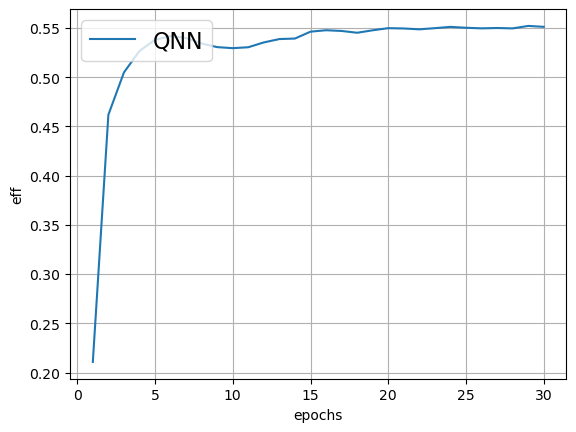

In [19]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
def filter_nan(arr): 

     """The way csv file is created for qnn networks, contain some 'nans'
    Therefore I created a function to remove 'nan' from the csv file array"""
     index =np.where( np.isnan(arr)==0)
     filter_arr = arr[index]
     return filter_arr;
    

##initializing figure
fig, ax = plt.subplots(1, 1)    
obs = {0:"pur",1:"eff",2:"train_loss",3:"val_loss"}  ##observations that we are interested in
epoch = np.arange(1,31)   ### epoch array from values 1 to 30 


df = pd.read_csv("metrics_50.csv")  ##reading the csv file

j = 1 ##it will plot eff see "obs array" if it's 3 then it will plot val_loss
ax.set_xlabel("epochs")
ax.set_ylabel(obs[j])
ya = filter_nan(np.array(df[obs[j]]))  ##accessing desirable array and passing it through the filter nan function
ax.plot(epoch,ya,label = "QNN" ) ##plotting 
ax.grid(True)  
ax.legend(loc=2, prop={'size': 16})
# plt.suptitle(inputs + "  Input bit width = weight_bit width,Bias-False")  ##this creates the title
# plt.savefig(inputs+".jpg")  ##this commands saves the figure
plt.show()    
            
 
